# DDA3020 Assignment 1 - Coding problem 1

*Mengkang Li     <mengkangli@link.cuhk.edu.cn>*

*School of Data Science, The Chinese University of Hongkong, Shenzhen*

*2024.02.12*

In this file, I will finish the problem1 and problem2 of dda3020 assignment1.

## Step 1: Load and check the dataset

In [1]:
# Load the dataset
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

df = pd.read_csv('house_prices.csv')
df['Neighborhood'] = df['Neighborhood'].astype('category')


In [2]:
# Check the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   SqFt          128 non-null    int64   
 1   Bedrooms      128 non-null    int64   
 2   Bathrooms     128 non-null    int64   
 3   Neighborhood  128 non-null    category
 4   Price         128 non-null    int64   
dtypes: category(1), int64(4)
memory usage: 4.4 KB


In [3]:
df.describe()

,SqFt,Bedrooms,Bathrooms,Price
count,128.000000,128.000000,128.000000,128.000000
mean,2000.937500,3.023438,2.445312,130427.343750
std,211.572431,0.725951,0.514492,26868.770371
min,1450.000000,2.000000,2.000000,69100.000000
25%,1880.000000,3.000000,2.000000,111325.000000
50%,2000.000000,3.000000,2.000000,125950.000000
75%,2140.000000,3.000000,3.000000,148250.000000
max,2590.000000,5.000000,4.000000,211200.000000


## Step 2: Visualize the dataset

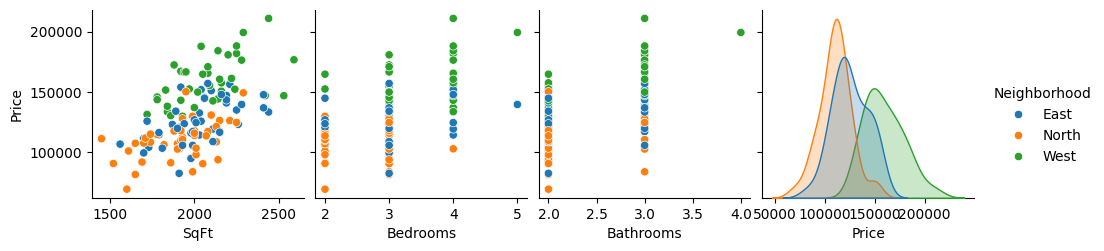

In [4]:
# plot the "price" against the three numerical columns
import seaborn as sns

sns.pairplot(df, y_vars=['Price'], hue='Neighborhood')

<Axes: title={'center': 'Heatmap between All Features'}>

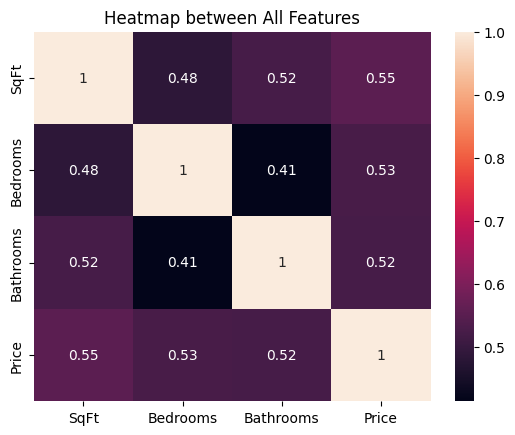

In [5]:
# heatmap
import seaborn as sns
import matplotlib.pyplot as plt 
# for the Neighborhood: 
# 1. use Ont-Hot coding to compute the correlation coefficient
df_data = pd.get_dummies(df, columns=['Neighborhood'])
# 2. or just drop the columns (working)
df_data = df.drop('Neighborhood', axis=True) 
# matplotlib installed by conda will cause some disorder problems... change it using pip install matplotlib

plt.title('Heatmap between All Features')
sns.heatmap(df_data.corr(), annot=True)

## Step 3: Preprocessing the dataset

In [6]:
# Deal with 'Neighborhood' feature using One-Hot coding

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
df_targets = df['Price']
df_features = df.drop('Price', axis=1)
column_transformer = ColumnTransformer( [('encoder', OneHotEncoder(), ['Neighborhood'])], remainder='passthrough')

df_features = column_transformer.fit_transform(df_features)



In [7]:
# Split the data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_features, df_targets, test_size=0.2, random_state=157)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(102, 6)
(26, 6)
(102,)
(26,)


## Step 4: Train the linear regression model and analysis

In [8]:
# train the model 

from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X_train, y_train)

y_pred = model.predict(X_test)



In [9]:
# analysis

from sklearn.metrics import mean_squared_error
import numpy as np
train_mse = mean_squared_error(y_train, model.predict(X_train))
train_rmse = np.sqrt(train_mse)
test_mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
test_rmse = np.sqrt(test_mse)
print("Train RMSE: " + str(train_rmse))
print("Test RMSE: " + str(test_rmse))



Train RMSE: 14349.994710239715
Test RMSE: 15291.173754894138


# DDA3020 Assignment 1 - Coding problem 2
In the following, I will finish problem2.

## Step 1: Use numpy to implement linear regression with gradient descent

In [10]:
# Train of linear regression
"""

train: 
predict: 

"""
import numpy as np
import pandas as pd
class linear_regression():
    def __init__(self):
        self.w = None
        self.X = None
        self.y = None
        self.loss_record = []

    def train(self, X, y, alpha=0.005, gamma=0.00001, iteration=1000, random_state=None):
        def gradient(w, X, y):
            return np.dot(X.T, (np.dot(X, w) - y))
        def loss(w, X, y):
            return np.mean((np.dot(X, w) - y)**2)
        if random_state is not None:
            np.random.seed(random_state)

        X_sub = np.insert(X, 0, 1, axis=1)
        w = np.random.uniform(0, 1, size=X_sub.shape[1])
        grad = gradient(w, X_sub, y)
        iter_num = 0
        while np.linalg.norm(grad) >= gamma and iter_num < iteration: 
            w = w - grad * alpha
            grad = gradient(w, X_sub, y)
            lo = loss(w, X_sub, y)
            self.loss_record.append(lo)
            iter_num += 1
        self.w = w
    def predict(self, X):
        X_sub = np.insert(X, 0, 1, axis=1)
        y_pred = np.dot(X_sub, self.w.T) 
        return y_pred
    def get_paras(self):
        return self.w

## Step 2: Train the model and check loss

In [11]:
# Load the dataset and check the basic info of it

from sklearn.datasets import load_diabetes

data = load_diabetes().data
targets = load_diabetes().target

data = np.array(data)
targets = np.array(targets)

print(data.shape)
print(targets.shape)

(442, 10)
(442,)


In [12]:
# Split the dataset, train and predict. 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, targets, test_size=0.2, random_state=314)

lg = linear_regression()
lg.train(X_train, y_train)
y_pred = lg.predict(X_test)


In [13]:
# Analysis

from sklearn.metrics import mean_squared_error
train_rmse = np.sqrt(mean_squared_error(y_train, lg.predict(X_train)))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Train RMSE: \t", str(train_rmse))
print("Test RMSE: \t", str(test_rmse))

Train RMSE: 	 53.794524990311494
Test RMSE: 	 53.51343957038612


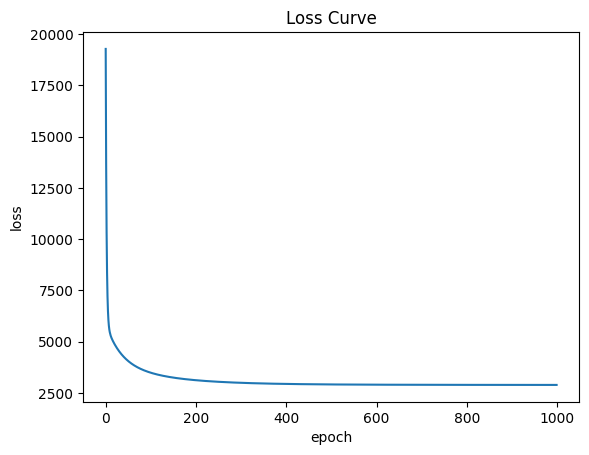

In [14]:
# Plot the loss function

import matplotlib.pyplot as plt

loss = np.array(lg.loss_record)
plt.plot(np.arange(loss.shape[0]), loss)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("Loss Curve")
plt.show()

## Step 3: Tuning the parameters

In [15]:
# Choose different parameters
import numpy as np

step_sizes = np.arange(0.001, 0.011, 0.001)
iterations = np.arange(100, 2100, 200)
gammas = np.arange(0, 0.1, 0.01)



In [16]:
# Train the model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_diabetes

data = load_diabetes().data
target = load_diabetes().target

params = [
    [0.0005, 100],
    [0.0005, 1000],
    [0.0005, 10000],
    [0.001, 100],
    [0.001, 1000],
    [0.001, 10000],
    [0.005, 100],
    [0.005, 1000],
    [0.005, 10000],
    [0.01, 100],
    [0.01, 1000],
    [0.01, 10000],
]
count = 1
for param in params:
    print(f"----------{count}----------")
    count += 1
    step_size = param[0]
    iteration = param[1]
    print("TUNING: step size = " + str(step_size))
    print("TUNING: iteration = " + str(iteration))
    X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=314)
    lr = linear_regression()
    lr.train(X_train, y_train, alpha=step_size, iteration=iteration)
    y_pred_train = lr.predict(X_train)
    y_pred = lr.predict(X_test)

    if np.any(np.isinf(y_pred)) or np.any(np.isinf(y_pred_train)):
        print("The model cannot converge to a finite value.")
        continue
    print("Train RMSE: " + str(np.sqrt(mean_squared_error(y_train, y_pred_train))))
    print("Test RMSE: " + str(np.sqrt(mean_squared_error(y_test, y_pred))))

----------1----------
TUNING: step size = 0.0005
TUNING: iteration = 100
Train RMSE: 73.25198438490882
Test RMSE: 71.78909276204799
----------2----------
TUNING: step size = 0.0005
TUNING: iteration = 1000
Train RMSE: 59.14046967255578
Test RMSE: 58.16183296804418
----------3----------
TUNING: step size = 0.0005
TUNING: iteration = 10000
Train RMSE: 53.794542659439756
Test RMSE: 53.51380227469954
----------4----------
TUNING: step size = 0.001
TUNING: iteration = 100
Train RMSE: 70.08671811761593
Test RMSE: 68.55756612478207
----------5----------
TUNING: step size = 0.001
TUNING: iteration = 1000
Train RMSE: 55.905217713138555
Test RMSE: 55.560485508929006
----------6----------
TUNING: step size = 0.001
TUNING: iteration = 10000
Train RMSE: 53.770829447863136
Test RMSE: 53.453966658167694
----------7----------
TUNING: step size = 0.005
TUNING: iteration = 100
Train RMSE: 59.11877070125161
Test RMSE: 58.145218522278604
----------8----------
TUNING: step size = 0.005
TUNING: iteration = 